In [2]:
import pandas as pd 
import numpy as np 
import plotly.express as px 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

In [3]:
df = pd.read_csv("./gym_members_exercise_tracking.csv")

In [4]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [5]:
df.info()
#We have already noticed that there were no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [6]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


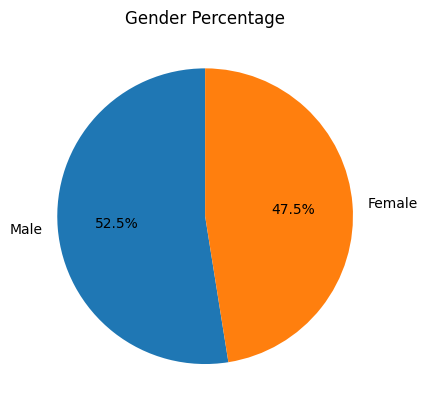

In [7]:
gender_counts = df['Gender'].value_counts()
gender_percentage = gender_counts / gender_counts.sum() * 100

plt.pie(gender_percentage, labels=gender_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title("Gender Percentage")
plt.show()

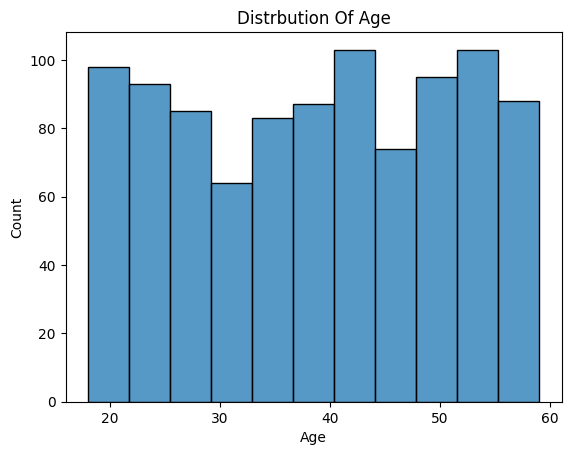

In [8]:
sns.histplot(data=df, x='Age')
plt.title("Distrbution Of Age")
plt.show()

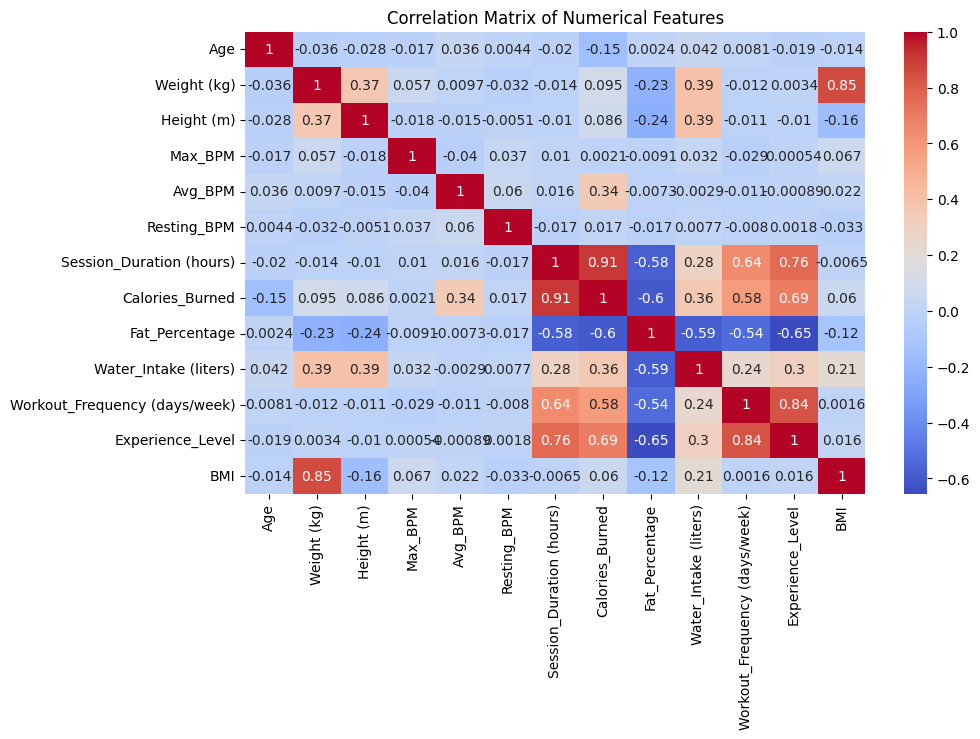

In [9]:
numerical_data = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numerical_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

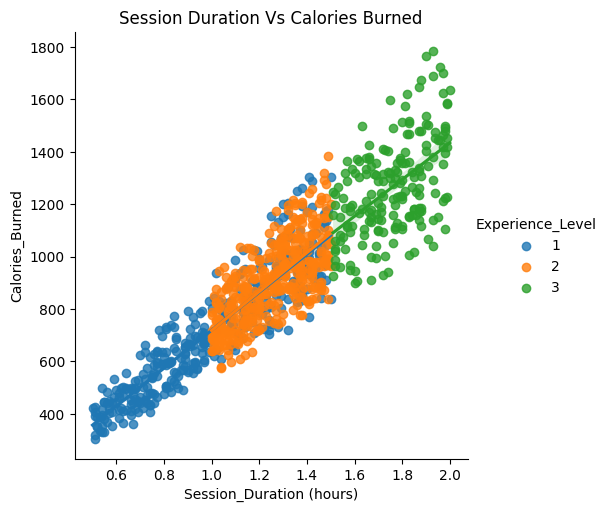

In [10]:
sns.lmplot( data=df , x="Session_Duration (hours)", y="Calories_Burned", hue="Experience_Level")
plt.title('Session Duration Vs Calories Burned')
plt.show()

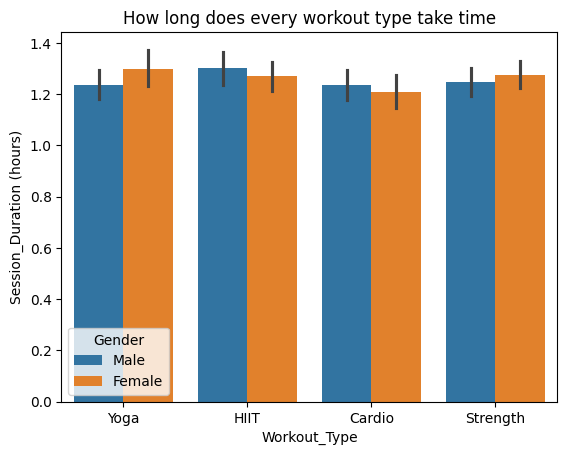

In [11]:
sns.barplot(x='Workout_Type', y='Session_Duration (hours)', data=df, hue='Gender')
plt.title('How long does every workout type take time')
plt.show()

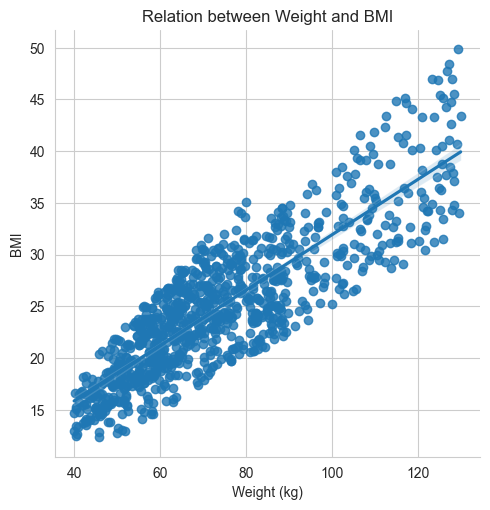

In [12]:
sns.set_style('whitegrid')
sns.lmplot(x ='Weight (kg)', y ='BMI', data = df)
plt.title('Relation between Weight and BMI')
plt.show()

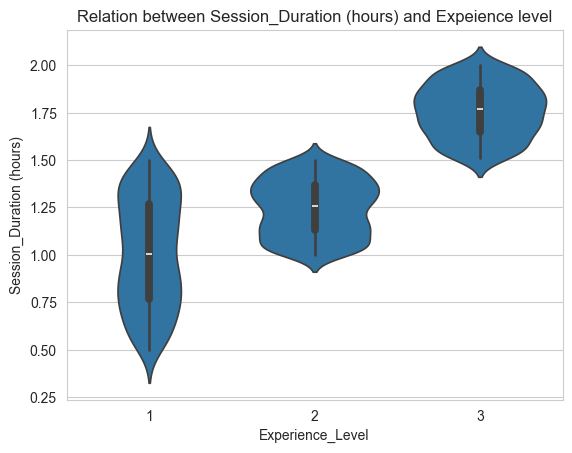

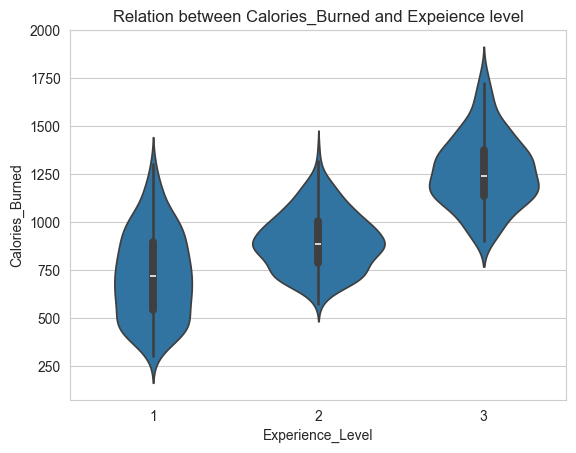

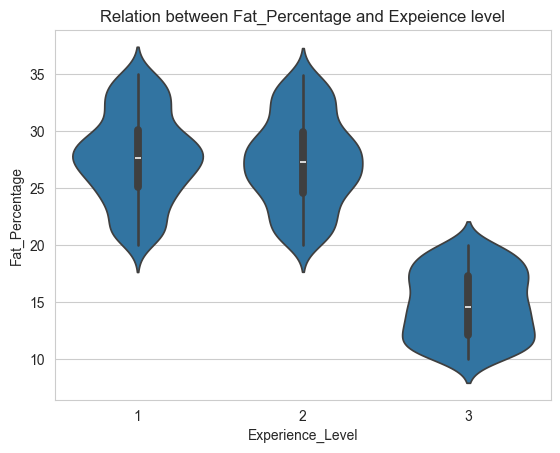

In [13]:
new = df[['Session_Duration (hours)','Calories_Burned','Fat_Percentage']]
for i in new : 
    plt.title(f"Relation between {i} and Expeience level")
    sns.violinplot(x="Experience_Level", y=i , data=df)
    plt.show()

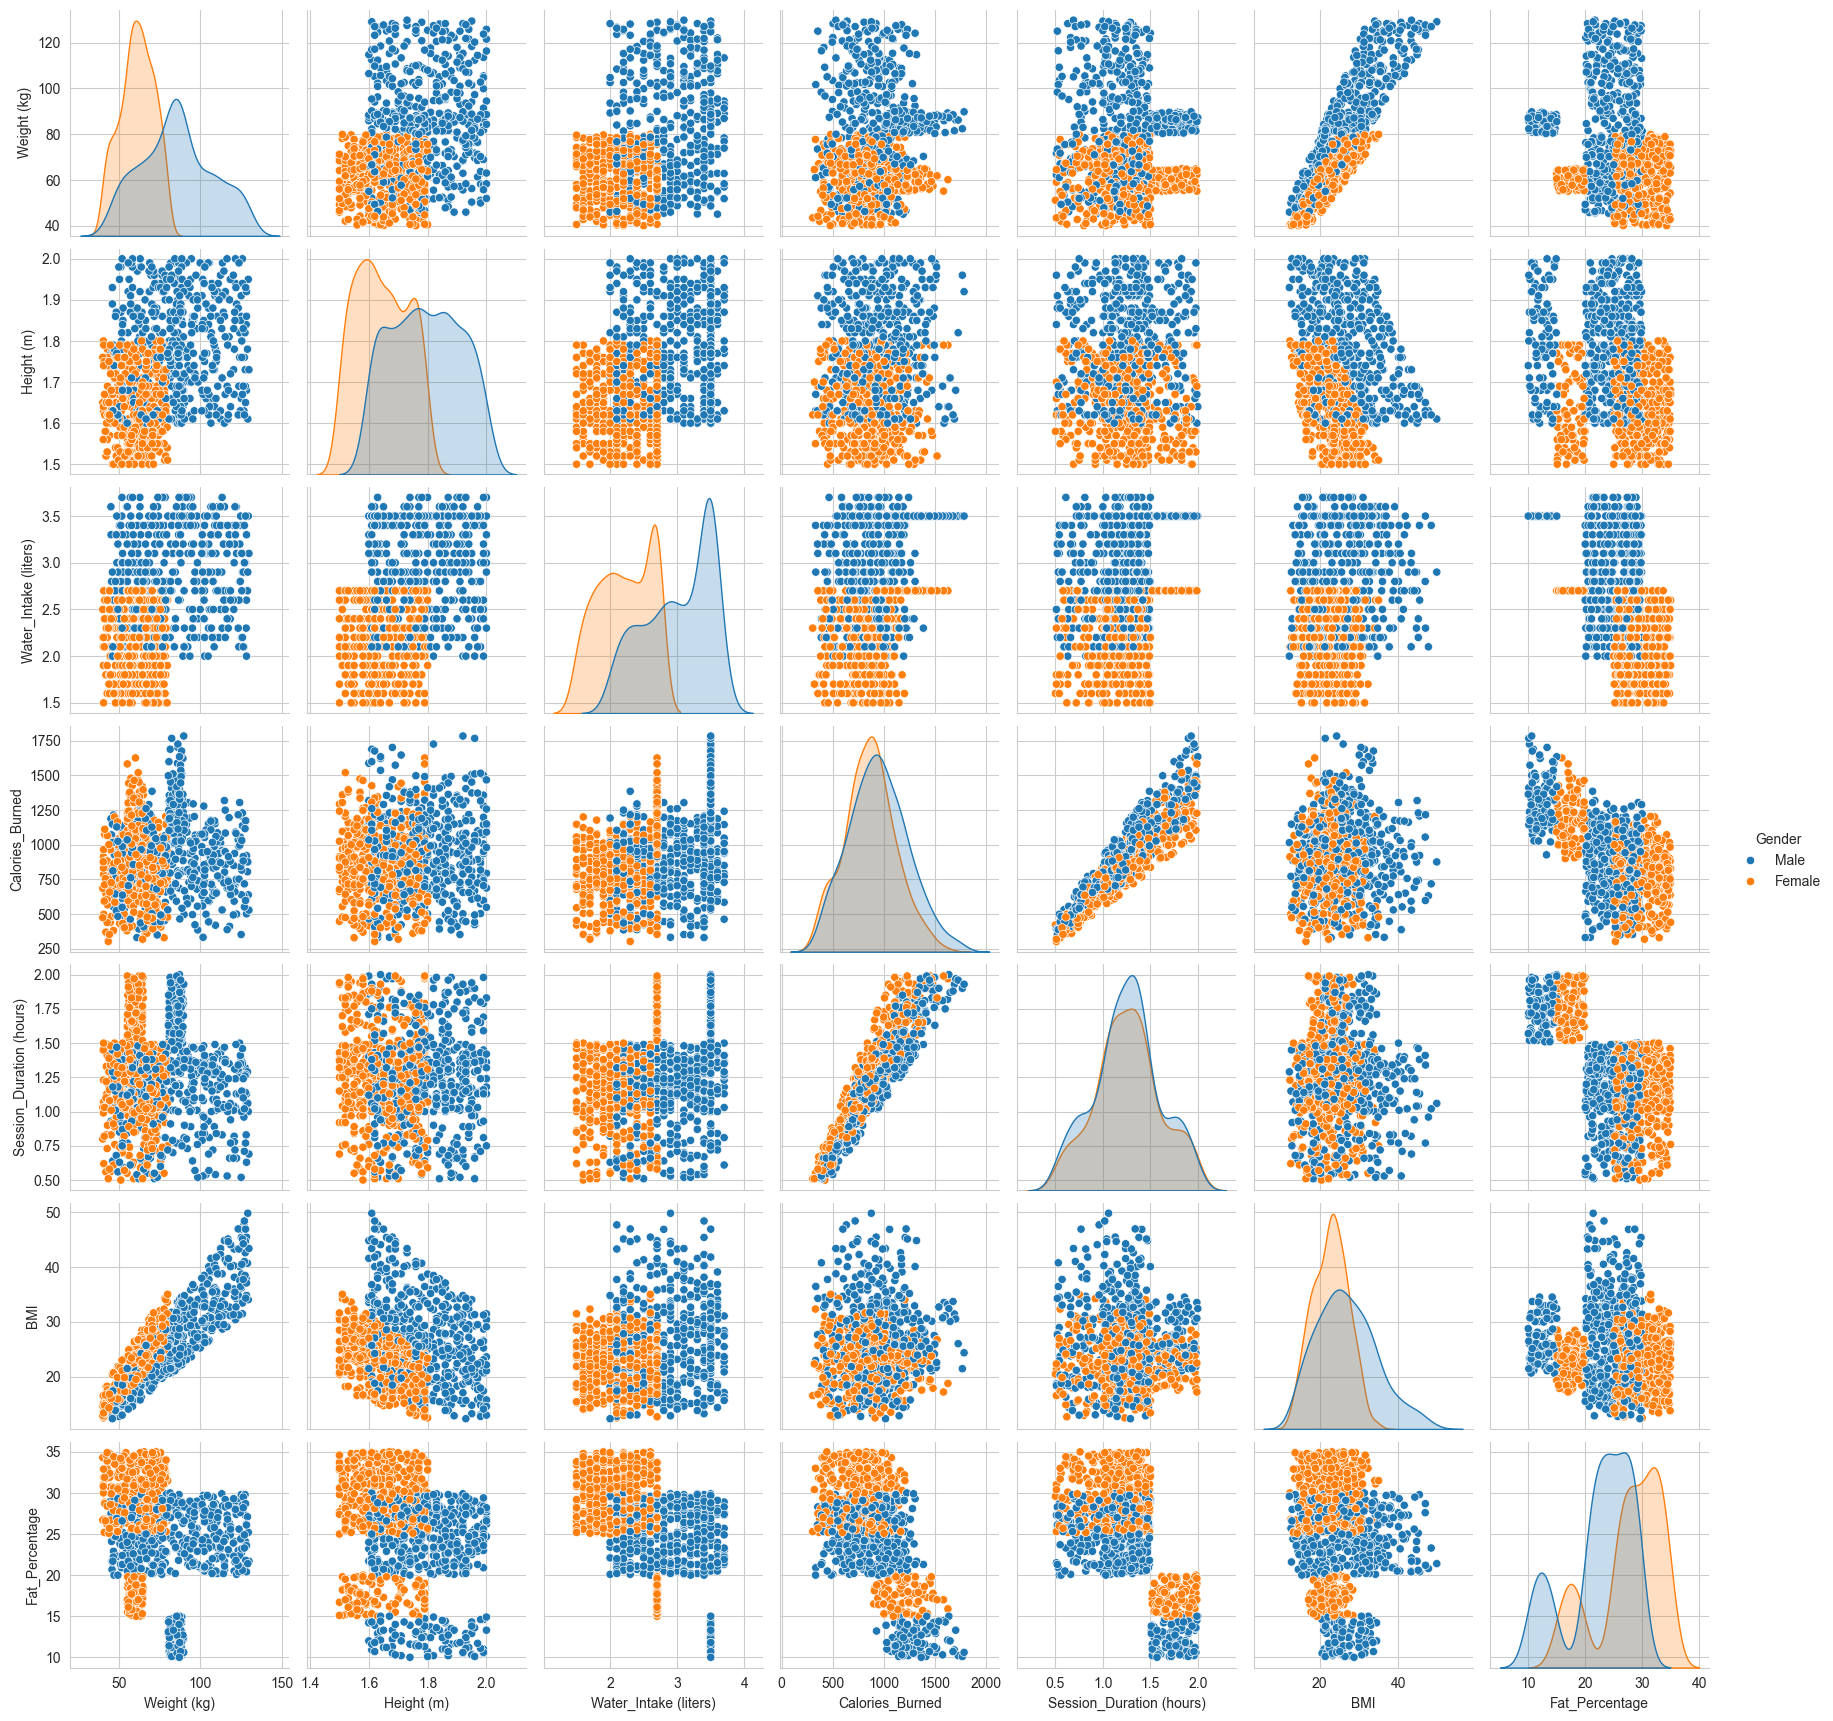

In [14]:
newdf = df[['Weight (kg)', 'Height (m)', 'Water_Intake (liters)', 'Calories_Burned', 'Session_Duration (hours)','BMI','Fat_Percentage','Gender']]

sns.pairplot(data=newdf, hue= 'Gender')